# 🏥 Predicting Patient No-Shows for Healthcare Appointments

Loading the data into Data Frame and Data Pre Processing

In [93]:
import pandas as pd

df = pd.read_csv('healthcare_noshows.csv')

print("Original shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

df.drop_duplicates(inplace=True)

df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

date_columns = ['scheduledday', 'appointmentday']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

columns_to_drop = ['patientid', 'appointmentid', 'neighbourhood']
df.drop(columns=columns_to_drop, inplace=True)

print("\nCleaned shape:", df.shape)
print("\nRemaining columns:\n", df.columns)
print("\nSample data:\n", df.head())


Original shape: (106987, 15)

Missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

Cleaned shape: (106987, 12)

Remaining columns:
 Index(['gender', 'scheduledday', 'appointmentday', 'age', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'showed_up', 'date.diff'],
      dtype='object')

Sample data:
   gender scheduledday appointmentday  age  scholarship  hipertension  \
0      F   2016-04-29     2016-04-29   62        False          True   
1      M   2016-04-29     2016-04-29   56        False         False   
2      F   2016-04-29     2016-04-29   62        False         False   
3      F   2016-04-29     2016-04-29    8        False         False   
4      F  

In [94]:
bool_columns = df.select_dtypes(include='bool').columns.tolist()

for col in bool_columns:
    df[col] = df[col].map({True: 1, False: 0})

In [95]:
df

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,date.diff
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,0
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,0
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,0
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,0
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106982,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,1,35
106983,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,1,35
106984,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,1,41
106985,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,1,41


In [96]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

df['scheduled_dayofweek'] = df['scheduledday'].dt.dayofweek.apply(lambda x: (x + 1) % 7)
df['appointment_dayofweek'] = df['appointmentday'].dt.dayofweek.apply(lambda x: (x + 1) % 7)

df

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,date.diff,scheduled_dayofweek,appointment_dayofweek
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,0,5,5
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,0,5,5
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,0,5,5
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,0,5,5
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,1,35,2,2
106983,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,1,35,2,2
106984,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,1,41,3,2
106985,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,1,41,3,2


In [97]:

bins = [0, 12, 19, 35, 60, float('inf')]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

df

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,date.diff,scheduled_dayofweek,appointment_dayofweek,age_group
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,0,5,5,Senior
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,0,5,5,Adult
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,0,5,5,Senior
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,0,5,5,Child
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,0,5,5,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,1,35,2,2,Adult
106983,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,1,35,2,2,Adult
106984,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,1,41,3,2,Young Adult
106985,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,1,41,3,2,Adult


# Data Exploration

C:\Users\rishi\AppData\Local\Temp\ipykernel_20236\3511756259.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='age_group', order=labels, palette=palette)
C:\Users\rishi\AppData\Local\Temp\ipykernel_20236\3511756259.py:22: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.countplot(data=df, x='age_group', order=labels, palette=palette)


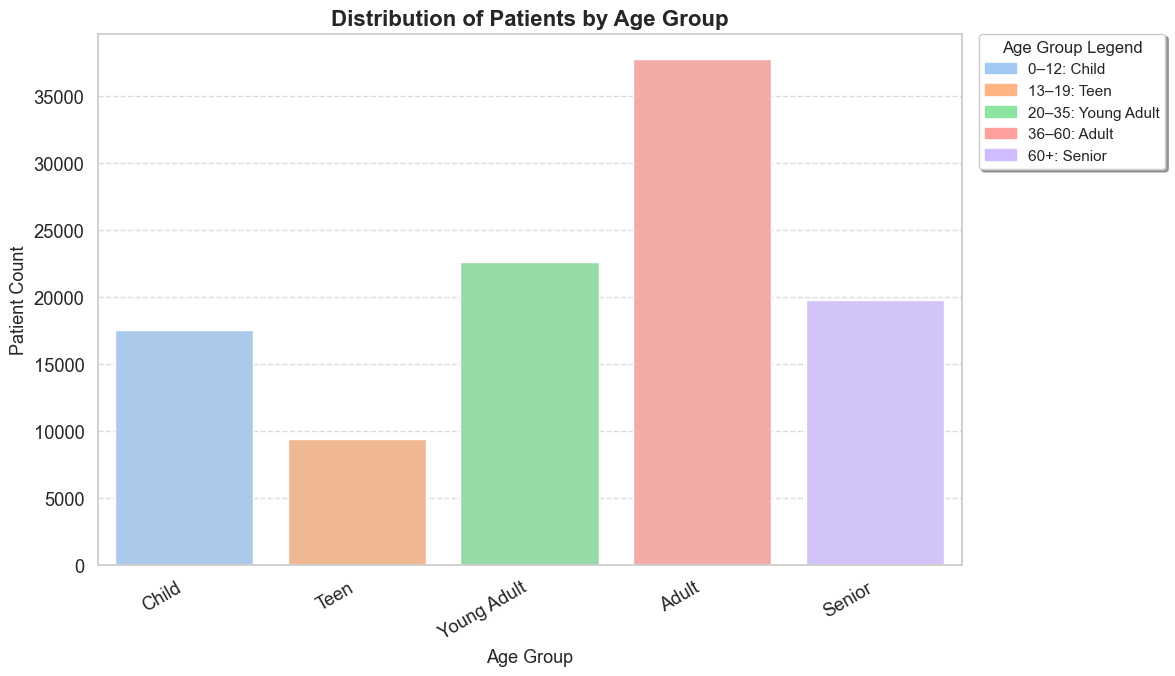

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Load the dataset
df = pd.read_csv("healthcare_noshows.csv")  # Update path if needed

# Define age bins and labels
bins = [0, 12, 19, 35, 60, float('inf')]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Set Seaborn style
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

# Use a pastel color palette
palette = sns.color_palette("pastel")

# Create the countplot
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x='age_group', order=labels, palette=palette)

# Set titles and axis labels
plt.title('Distribution of Patients by Age Group', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Patient Count', fontsize=13)
plt.xticks(rotation=30, ha='right')

# Custom legend labels and colors
legend_labels = [
    '0–12: Child',
    '13–19: Teen',
    '20–35: Young Adult',
    '36–60: Adult',
    '60+: Senior'
]
legend_colors = palette[:len(legend_labels)]
patches = [mpatches.Patch(color=legend_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]

# Add legend to the plot
plt.legend(
    handles=patches,
    title='Age Group Legend',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize=11,
    title_fontsize=12,
    frameon=True,
    shadow=True
)

# Add grid and layout adjustments
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as PNG
plt.savefig("Age_Group_Distribution_Styled.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\rishi\AppData\Local\Temp\ipykernel_20236\2182046106.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_show = df.groupby(['age_group', 'Showed_up']).size().reset_index(name='count')
C:\Users\rishi\AppData\Local\Temp\ipykernel_20236\2182046106.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_age = age_show.groupby('age_group')['count'].transform('sum')


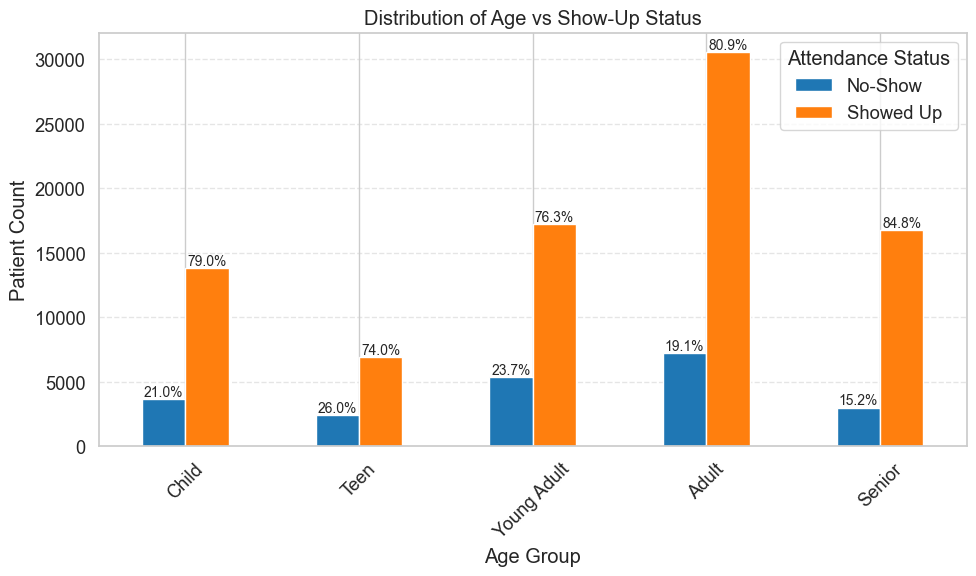

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has 'age_group' and 'Showed_up' columns
# Group by age_group and showed_up, compute counts and percentages
age_show = df.groupby(['age_group', 'Showed_up']).size().reset_index(name='count')
total_per_age = age_show.groupby('age_group')['count'].transform('sum')
age_show['percent'] = (age_show['count'] / total_per_age * 100).round(1)

# Pivot to create side-by-side bar chart data
pivot_count = age_show.pivot(index='age_group', columns='Showed_up', values='count')
pivot_percent = age_show.pivot(index='age_group', columns='Showed_up', values='percent')

# Plot
ax = pivot_count.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Labels and title
plt.title('Distribution of Age vs Show-Up Status')
plt.xlabel('Age Group')
plt.ylabel('Patient Count')
plt.xticks(rotation=45)  # Rotate x-axis labels

# Legend
ax.legend(["No-Show", "Showed Up"], title='Attendance Status')

# Annotate with percentages
for container, col in zip(ax.containers, pivot_percent.columns):
    for bar, label in zip(container, pivot_percent[col]):
        height = bar.get_height()
        ax.annotate(f'{label}%', (bar.get_x() + bar.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("Age_vs_ShowUp_Distribution_Rotated.png", dpi=300)
plt.show()



In [100]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff', 'age_group'],
      dtype='object')

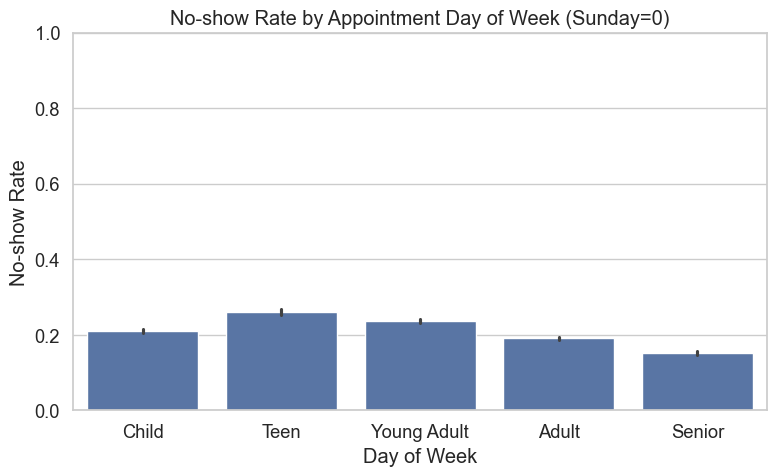

In [101]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='age_group', y='Showed_up', estimator=lambda x: 1 - sum(x)/len(x))
plt.title('No-show Rate by Appointment Day of Week (Sunday=0)')
plt.xlabel('Day of Week')
plt.ylabel('No-show Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

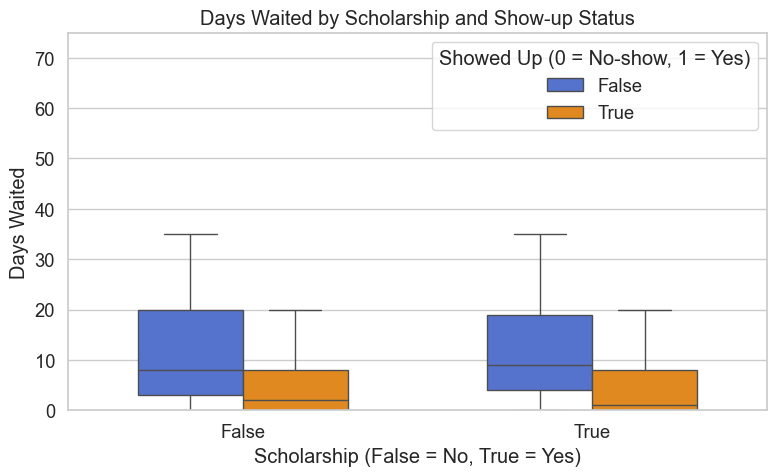

In [102]:
# Remove outliers using IQR
Q1 = df['Date.diff'].quantile(0.25)
Q3 = df['Date.diff'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['Date.diff'] >= Q1 - 1.5 * IQR) & (df['Date.diff'] <= Q3 + 1.5 * IQR)]

# Plot with improved colors and style
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=filtered_df,
    x='Scholarship',
    y='Date.diff',
    hue='Showed_up',
    palette={0: 'royalblue', 1: 'darkorange'},
    showfliers=False,
    width=0.6
)
plt.title('Days Waited by Scholarship and Show-up Status')
plt.xlabel('Scholarship (False = No, True = Yes)')
plt.ylabel('Days Waited')
plt.ylim(10, 75)  # Start from 10 to visually elevate the boxplot above x-axis
plt.yticks(range(0, 76,10))
plt.legend(title='Showed Up (0 = No-show, 1 = Yes)')
plt.tight_layout()
plt.show()

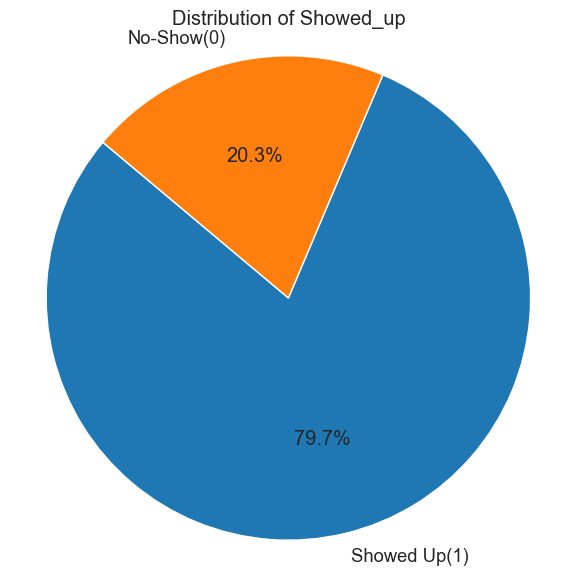

In [103]:
import matplotlib.pyplot as plt

# Count the Showed_up values
show_counts = df['Showed_up'].value_counts()
labels = ['No-Show(0)' if val == 0 else 'Showed Up(1)' for val in show_counts.index]
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    show_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    #shadow=True
)

plt.title('Distribution of Showed_up')
plt.axis('equal')  # Keeps it circular
plt.tight_layout()
plt.show()



In [104]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0,Senior
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0,Adult
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0,Senior
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0,Child
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35,Adult
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35,Adult
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41,Young Adult
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41,Adult


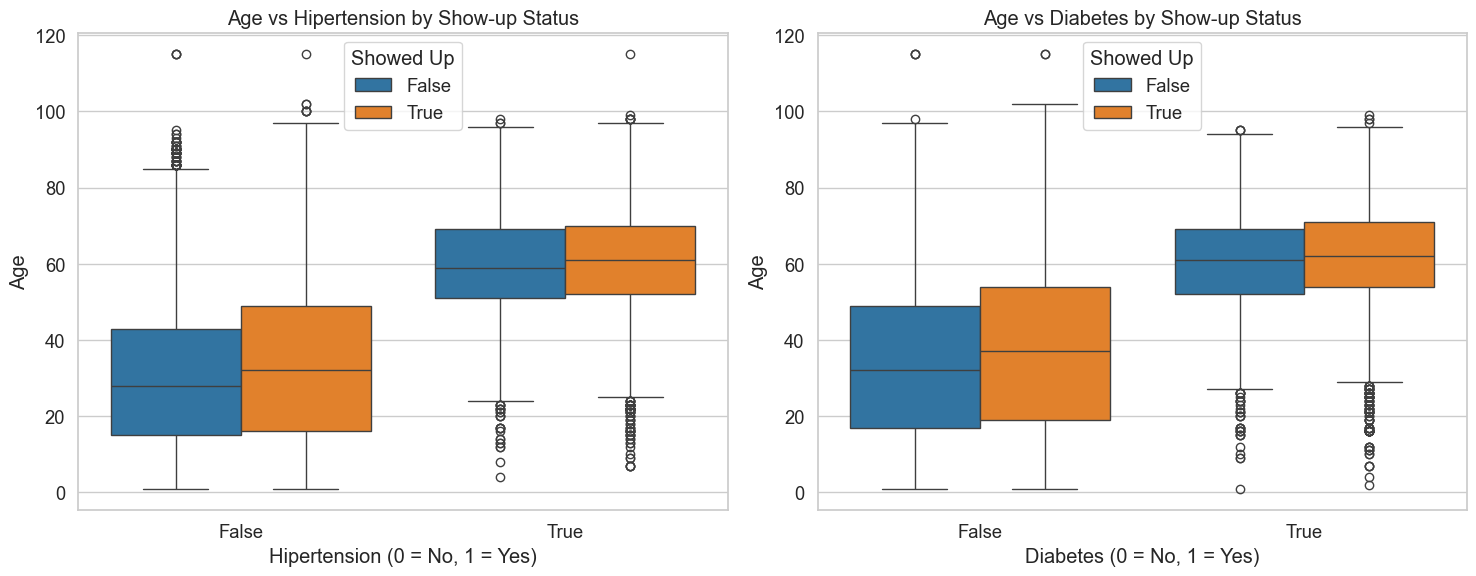

In [105]:
import seaborn as sns

# Use consistent blue (No-show) and orange (Showed Up)
custom_palette = ['#1f77b4', '#ff7f0e']

# Create side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot: Age vs Hipertension by Showed_up
sns.boxplot(
    x='Hipertension', y='Age', hue='Showed_up',
    data=df, palette=custom_palette, ax=axes[0]
)
axes[0].set_title('Age vs Hipertension by Show-up Status')
axes[0].set_xlabel('Hipertension (0 = No, 1 = Yes)')
axes[0].set_ylabel('Age')

# Boxplot: Age vs Diabetes by Showed_up
sns.boxplot(
    x='Diabetes', y='Age', hue='Showed_up',
    data=df, palette=custom_palette, ax=axes[1]
)
axes[1].set_title('Age vs Diabetes by Show-up Status')
axes[1].set_xlabel('Diabetes (0 = No, 1 = Yes)')
axes[1].set_ylabel('Age')

# Adjust layout and legend
axes[0].legend_.set_title('Showed Up')
axes[1].legend_.set_title('Showed Up')
plt.tight_layout()


C:\Users\rishi\AppData\Local\Temp\ipykernel_20236\3361590883.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette=custom_palette)
C:\Users\rishi\AppData\Local\Temp\ipykernel_20236\3361590883.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette=custom_palette)
C:\Users\rishi\AppData\Local\Temp\ipykernel_20236\3361590883.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette=custom_palette)
C:\Users\rishi\AppData\Local\Te

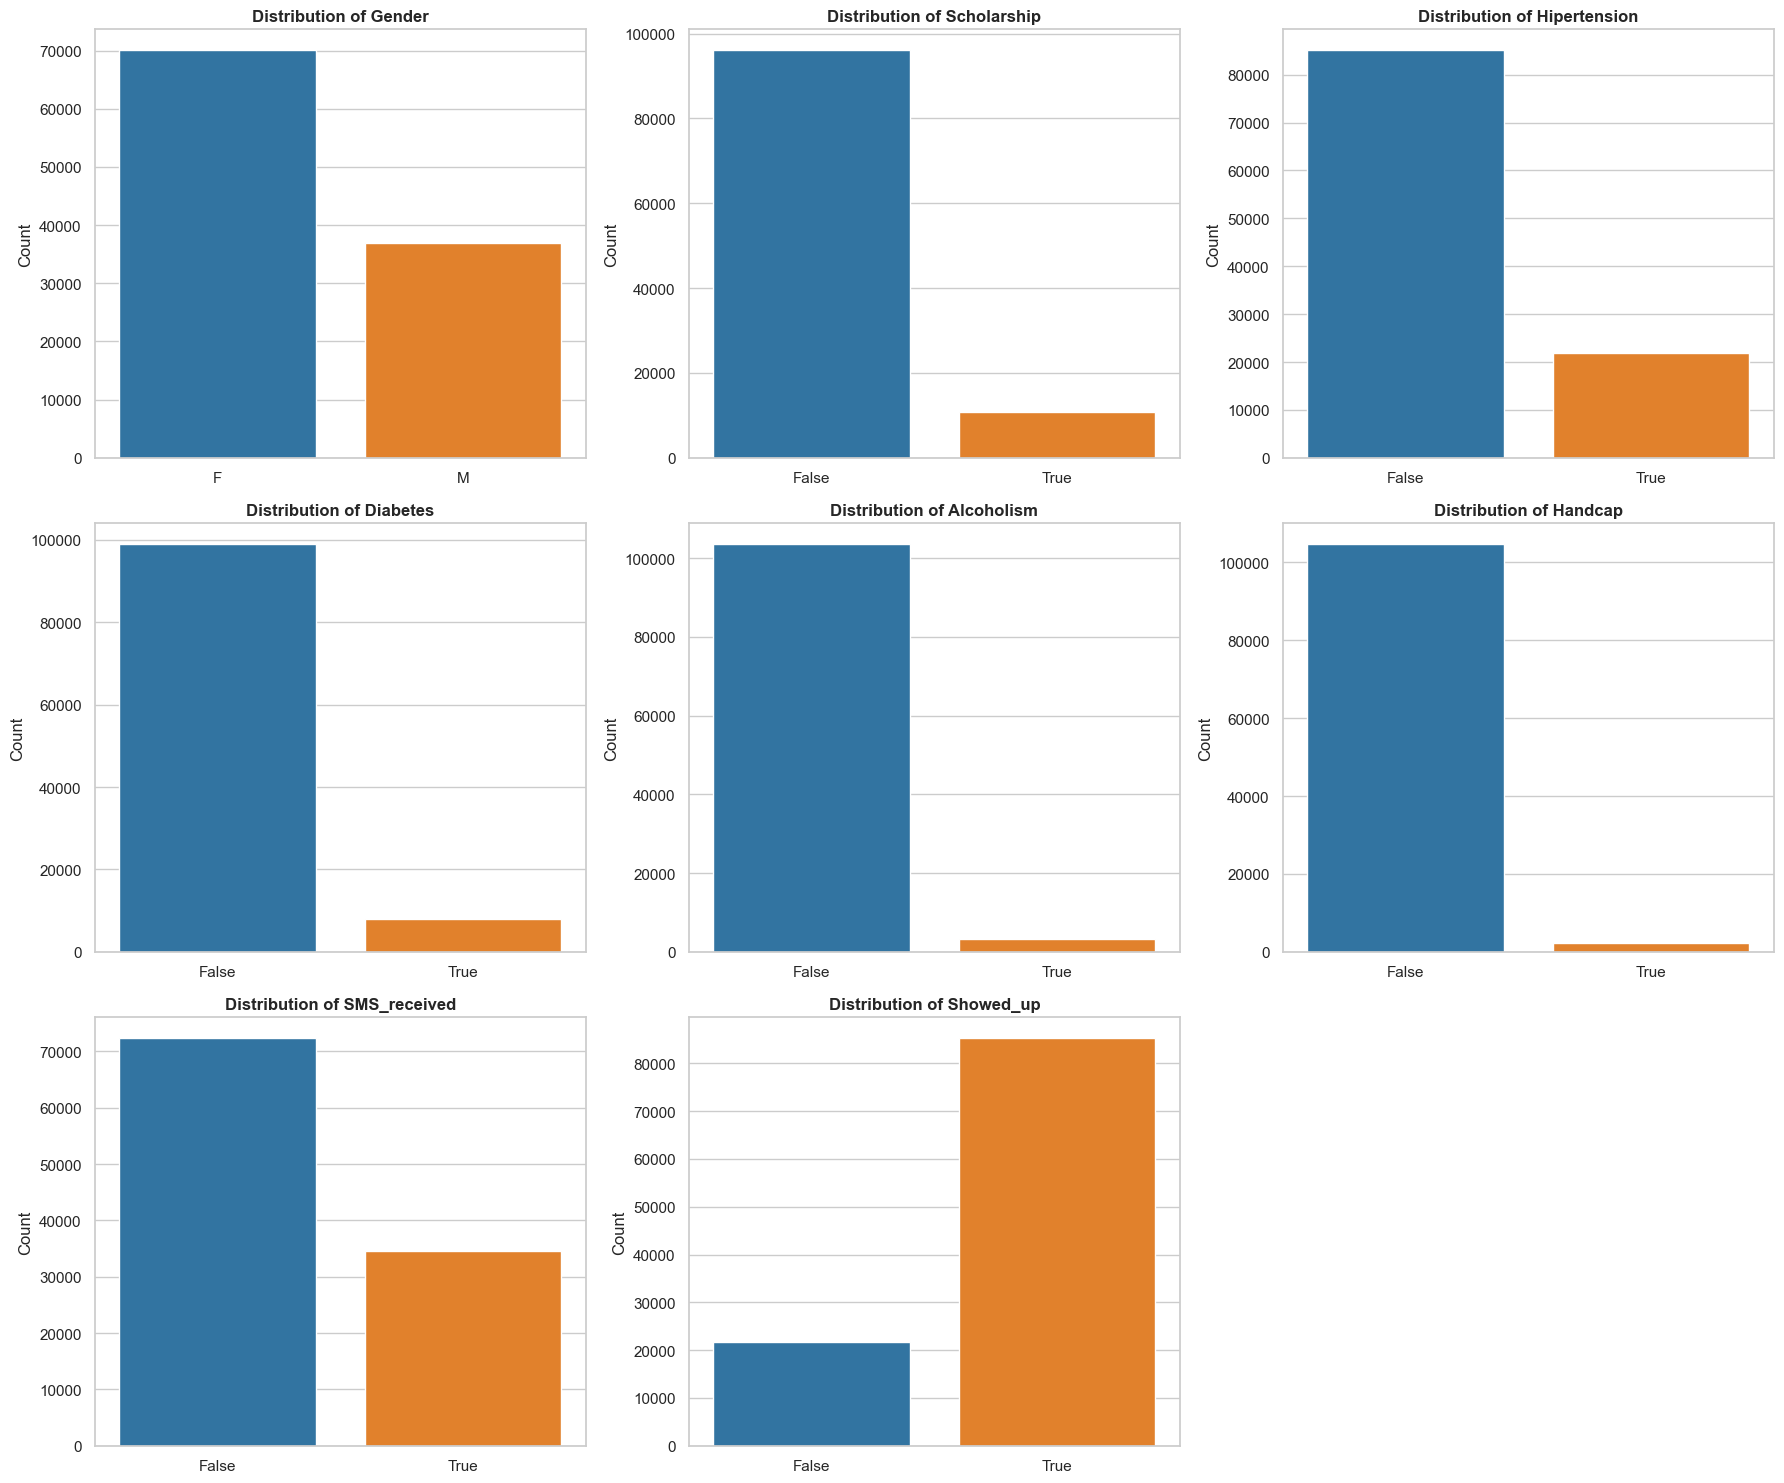

In [106]:
# Define categorical columns with correct casing
categorical_features = [
    'Gender', 'Scholarship', 'Hipertension', 'Diabetes',
    'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up'
]

# Use consistent color palette: blue (No) and orange (Yes)
custom_palette = ['#1f77b4', '#ff7f0e']

# Set seaborn style
sns.set(style="whitegrid")

# Create 3x3 subplots for categorical variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

# Loop through features and generate countplots
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)  # Keep x-axis labels straight

# Remove any unused subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

# Final layout adjustments and save
plt.tight_layout()
plt.savefig("Categorical_Distributions_Cleaned.png", dpi=300, bbox_inches='tight')
plt.show()

# Logistic Regression

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


# Load and preprocess data
df = pd.read_csv("healthcare_noshows.csv")
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')
df.drop(columns=['scheduledday', 'appointmentday', 'neighbourhood'], errors='ignore', inplace=True)
df.rename(columns={'date.diff': 'days_waited'}, inplace=True)
df['days_waited'] = df['days_waited'].apply(lambda x: max(x, 0))
df['gender'] = LabelEncoder().fit_transform(df['gender'])

# Age binning
bins = [0, 12, 19, 35, 60, float('inf')]
labels = ['0–12', '13–19', '20–35', '36–60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

X = df.drop(columns=['showed_up'])
y = df['showed_up']
X['days_waited'] = StandardScaler().fit_transform(X[['days_waited']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('sampler', SMOTE(random_state=42)),  # Oversample minority class using SMOTE
    ('classifier', LogisticRegression(random_state=42))  # Logistic Regression classifier
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.31      0.56      0.40      6524
        True       0.86      0.69      0.76     25573

    accuracy                           0.66     32097
   macro avg       0.59      0.62      0.58     32097
weighted avg       0.75      0.66      0.69     32097

Accuracy: 0.6622425771878991
Classification Report:
               precision    recall  f1-score   support

       False       0.31      0.56      0.40      6524
        True       0.86      0.69      0.76     25573

    accuracy                           0.66     32097
   macro avg       0.59      0.62      0.58     32097
weighted avg       0.75      0.66      0.69     32097

Confusion Matrix:
 [[ 3638  2886]
 [ 7955 17618]]


# Random Forest

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('healthcare_noshows.csv')
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

df.drop(columns=['patientid', 'appointmentid', 'neighbourhood', 'scheduledday', 'appointmentday'], inplace=True)

df.rename(columns={'date.diff': 'days_waited'}, inplace=True)
df['days_waited'] = df['days_waited'].apply(lambda x: max(x, 0)) 

df['gender'] = LabelEncoder().fit_transform(df['gender'])  

bins = [0, 12, 19, 35, 60, float('inf')]
labels = ['0–12', '13–19', '20–35', '36–60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

X = df.drop(columns=['showed_up'])
y = df['showed_up']

scaler = StandardScaler()
X['days_waited'] = scaler.fit_transform(X[['days_waited']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(" Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Random Forest Accuracy: 0.6935694924759324

Classification Report:
               precision    recall  f1-score   support

       False       0.31      0.41      0.35      4325
        True       0.84      0.76      0.80     17073

    accuracy                           0.69     21398
   macro avg       0.57      0.59      0.58     21398
weighted avg       0.73      0.69      0.71     21398


 Confusion Matrix:
 [[ 1781  2544]
 [ 4013 13060]]


# Feature Importances in Random Forest Model

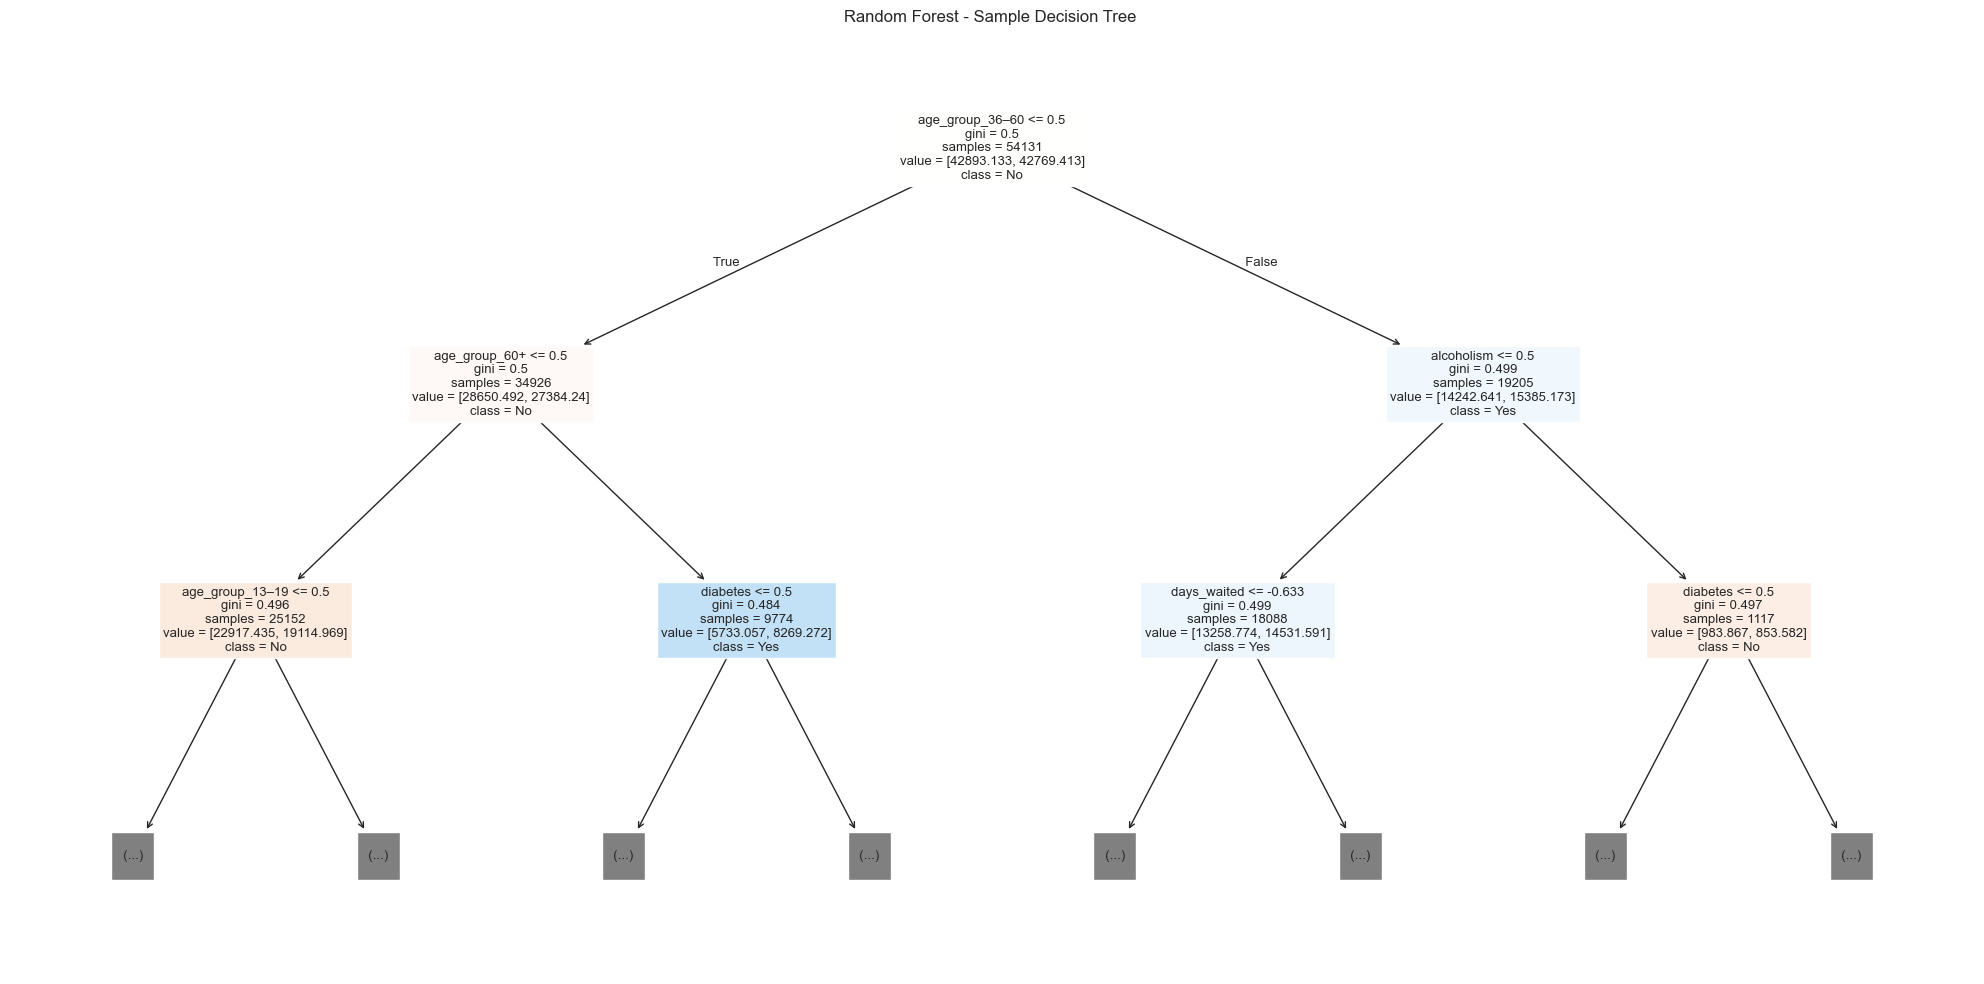

C:\Users\rishi\AppData\Local\Temp\ipykernel_20236\502289456.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


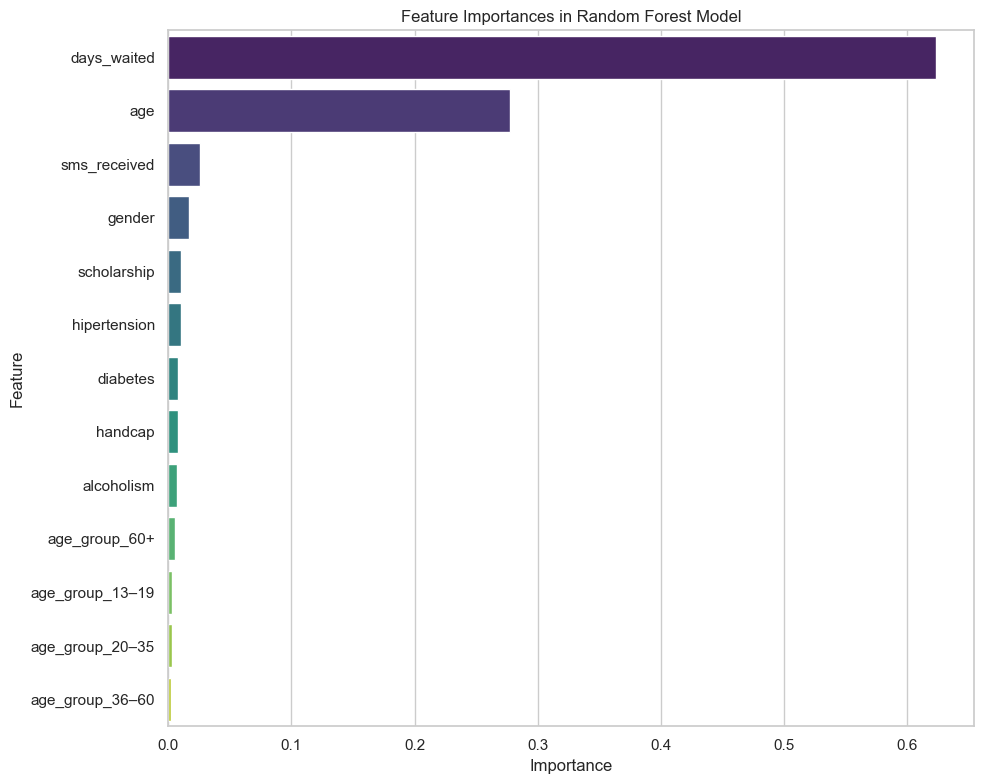

In [109]:
from sklearn.tree import plot_tree

# Decision Tree Plot
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["No", "Yes"], filled=True, max_depth=2)
plt.title("Random Forest - Sample Decision Tree ")
plt.tight_layout()
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importances in Random Forest Model')
plt.tight_layout()
plt.show()

# K-Means Clustering (age vs days_waited)

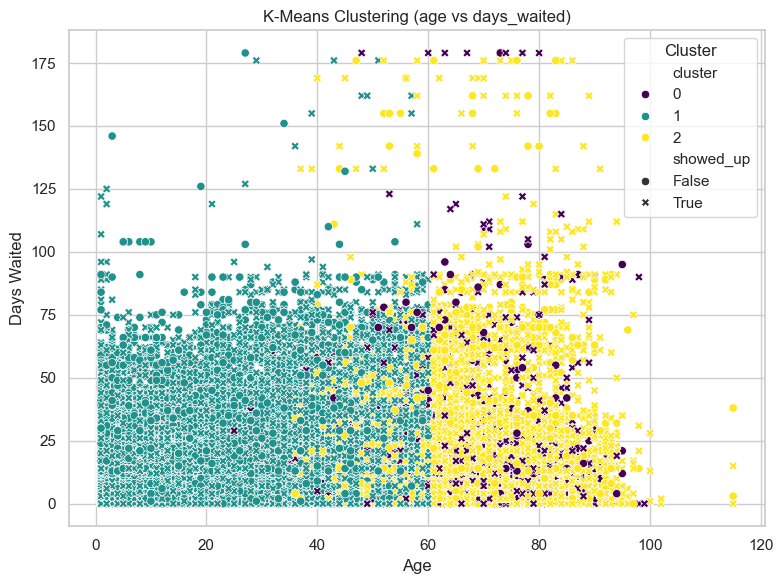

Cluster-wise Show-Up Rates:
 showed_up     False     True 
cluster                      
0          0.180033  0.819967
1          0.218000  0.782000
2          0.159326  0.840674


In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('healthcare_noshows.csv')
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')
df.rename(columns={'date.diff': 'days_waited'}, inplace=True)
df['days_waited'] = df['days_waited'].apply(lambda x: max(x, 0))

df.drop(columns=['patientid', 'appointmentid', 'neighbourhood', 'scheduledday', 'appointmentday'], inplace=True)

df['gender'] = df['gender'].map({'F': 0, 'M': 1})

bins = [0, 12, 19, 35, 60, float('inf')]
labels = ['0–12', '13–19', '20–35', '36–60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

X = df.drop(columns=['showed_up'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='age', y='days_waited',
    hue='cluster',
    style='showed_up',      
    data=df,
    palette='viridis'
)
plt.title("K-Means Clustering (age vs days_waited)")
plt.xlabel("Age")
plt.ylabel("Days Waited")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

cluster_summary = df.groupby('cluster')['showed_up'].value_counts(normalize=True).unstack()
print("Cluster-wise Show-Up Rates:\n", cluster_summary)


# Elbow Method for Optimal k

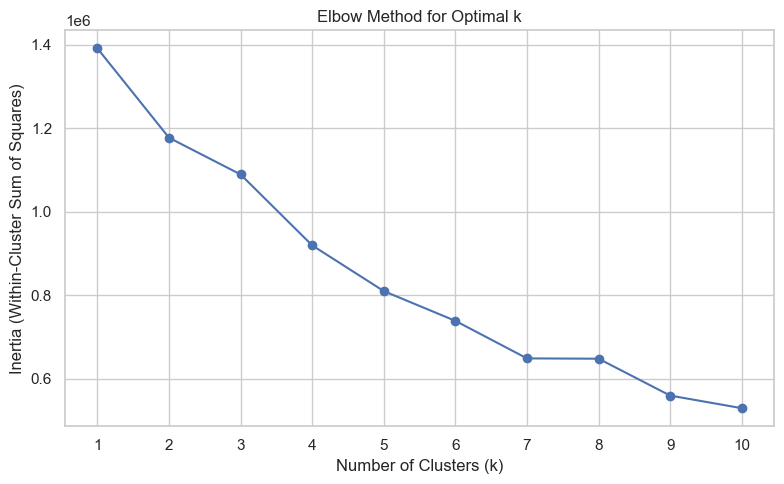

In [111]:
# Elbow method loop
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Decision Tree

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('healthcare_noshows.csv')
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

df.rename(columns={'date.diff': 'days_waited'}, inplace=True)
df['days_waited'] = df['days_waited'].apply(lambda x: max(x, 0))

df.drop(columns=['patientid', 'appointmentid', 'neighbourhood', 'scheduledday', 'appointmentday'], inplace=True)

df['gender'] = df['gender'].map({'F': 0, 'M': 1})

bins = [0, 12, 19, 35, 60, float('inf')]
labels = ['0–12', '13–19', '20–35', '36–60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

X = df.drop(columns=['showed_up'])
y = df['showed_up']

scaler = StandardScaler()
X['days_waited'] = scaler.fit_transform(X[['days_waited']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Decision Tree Accuracy: 0.5490700065426676

 Classification Report:
               precision    recall  f1-score   support

       False       0.29      0.85      0.43      4325
        True       0.93      0.47      0.63     17073

    accuracy                           0.55     21398
   macro avg       0.61      0.66      0.53     21398
weighted avg       0.80      0.55      0.59     21398


 Confusion Matrix:
 [[3686  639]
 [9010 8063]]


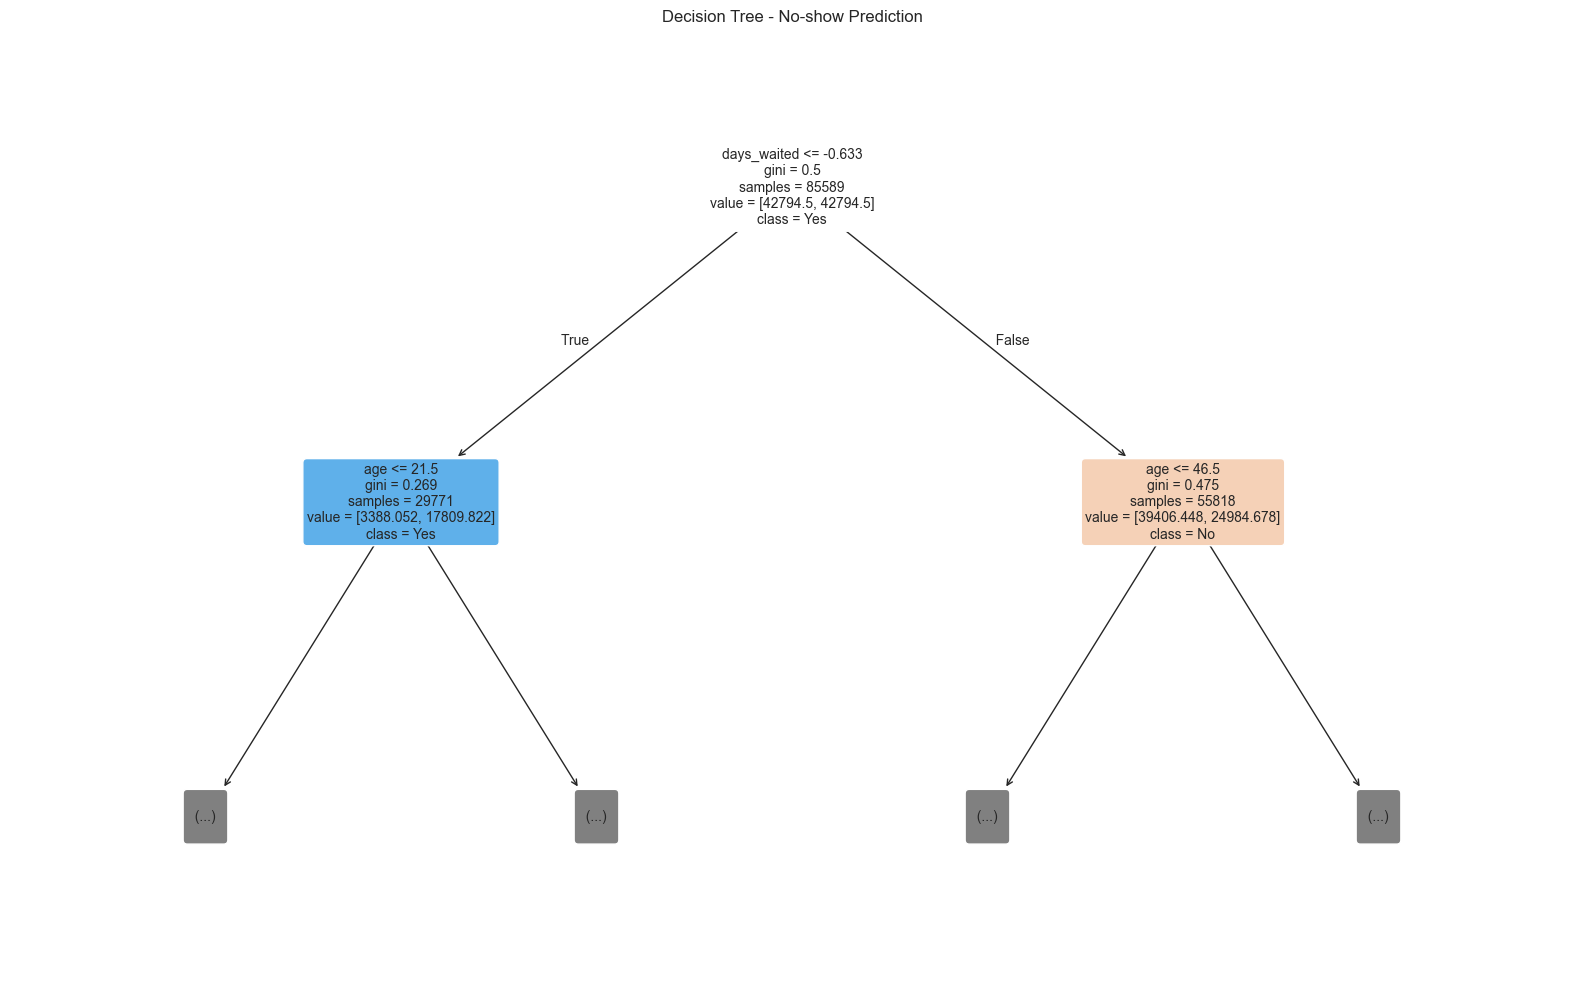

In [113]:
plt.figure(figsize=(16, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=1
)
plt.title("Decision Tree - No-show Prediction")
plt.tight_layout()

# Chi-square test for feature significance

In [114]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('healthcare_noshows.csv')
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

df['gender'] = df['gender'].map({'F': 0, 'M': 1})  # Optional: make numeric
df['showed_up'] = df['showed_up'].astype(int)     # Ensure it's binary 0/1

cat_cols = ['gender', 'scholarship', 'hipertension', 'diabetes',
            'alcoholism', 'handcap', 'sms_received']

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['showed_up'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"🔹 Feature: {col}")
    print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}, DoF: {dof}")
    print("Significant?" , " Yes" if p < 0.05 else " No", "\n")


🔹 Feature: gender
Chi-square: 1.11, p-value: 0.2931, DoF: 1
Significant?  No 

🔹 Feature: scholarship
Chi-square: 92.04, p-value: 0.0000, DoF: 1
Significant?  Yes 

🔹 Feature: hipertension
Chi-square: 148.46, p-value: 0.0000, DoF: 1
Significant?  Yes 

🔹 Feature: diabetes
Chi-square: 26.99, p-value: 0.0000, DoF: 1
Significant?  Yes 

🔹 Feature: alcoholism
Chi-square: 0.02, p-value: 0.8830, DoF: 1
Significant?  No 

🔹 Feature: handcap
Chi-square: 6.08, p-value: 0.0137, DoF: 1
Significant?  Yes 

🔹 Feature: sms_received
Chi-square: 1731.81, p-value: 0.0000, DoF: 1
Significant?  Yes 



# Correlation Matrix

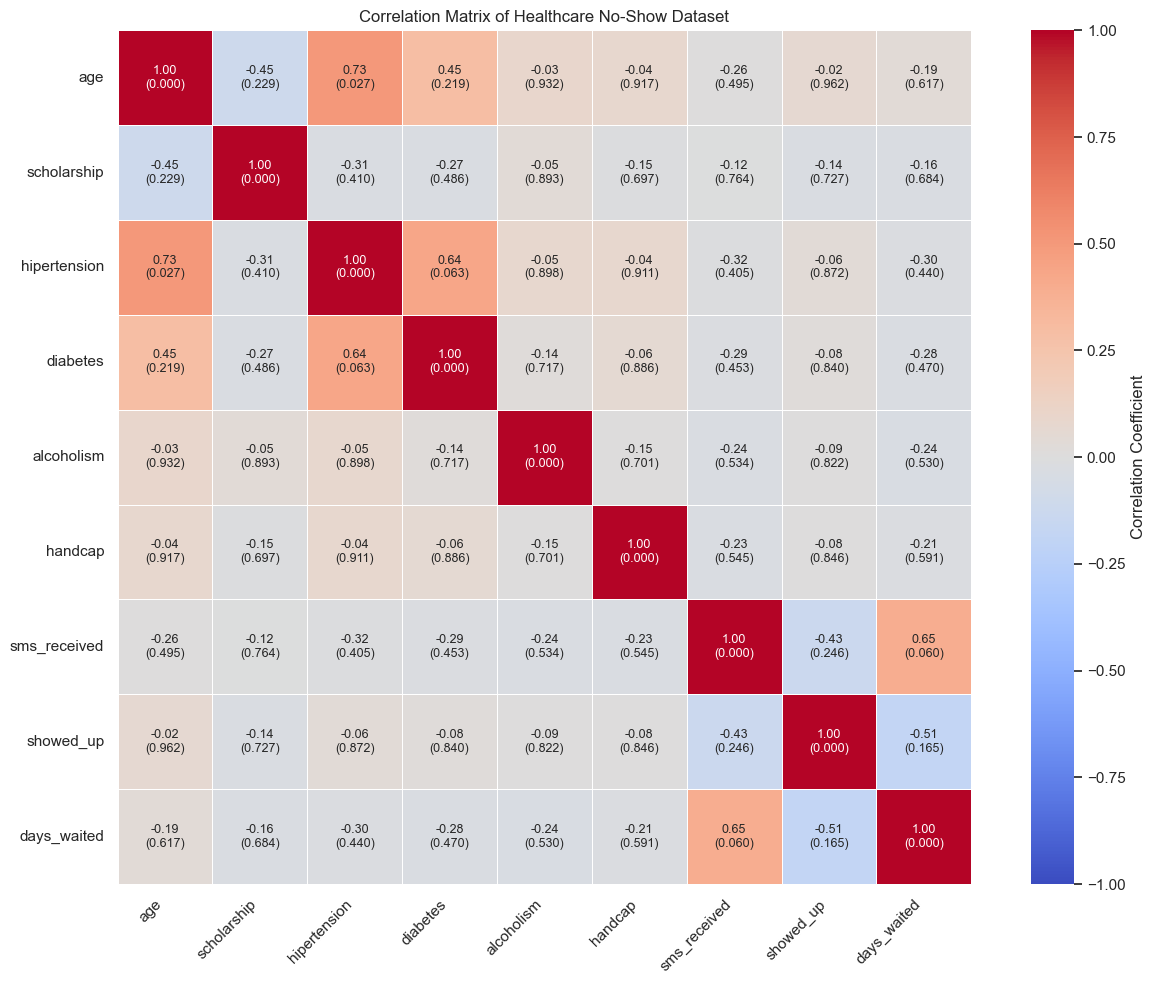

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = pd.read_csv('healthcare_noshows.csv')

df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

df.rename(columns={'date.diff': 'days_waited'}, inplace=True)
df['days_waited'] = df['days_waited'].apply(lambda x: max(x, 0))

df.drop(columns=['patientid', 'appointmentid', 'neighbourhood', 'scheduledday', 'appointmentday'], inplace=True)

#df['gender'] = df['gender'].map({'F': 0, 'M': 1})

corr_matrix = df.corr(numeric_only=True)
annot = pd.DataFrame('', index=corr_matrix.index, columns=corr_matrix.columns)
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        r, p = pearsonr(corr_matrix[i], corr_matrix[j])
        text = f"{r:.2f}\n({p:.3f})"
        if p < 0.05 and i != j:
            annot.loc[i, j] = f"{text}"  # bold for significant p-values
        else:
            annot.loc[i, j] = text

plt.figure(figsize=(13, 10))
sns.heatmap(corr_matrix.astype(float), annot=annot, fmt='', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={"size": 9}, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Healthcare No-Show Dataset")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [116]:
from scipy.stats import shapiro

stat, p = shapiro(df['days_waited'])
print(f'Shapiro-Wilk Test: p-value = {p:.5f}')
if p > 0.05:
    print("Data is likely normal.")
else:
    print(" Data is not normally distributed.")


Shapiro-Wilk Test: p-value = 0.00000
 Data is not normally distributed.


c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 106987.
  res = hypotest_fun_out(*samples, **kwds)


# Kruskal-Wallis H-test

In [117]:
import pandas as pd
from scipy.stats import kruskal

df = pd.read_csv('healthcare_noshows.csv')
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

df.rename(columns={'date.diff': 'days_waited'}, inplace=True)
df['days_waited'] = df['days_waited'].apply(lambda x: max(x, 0))

bins = [0, 12, 19, 35, 60, float('inf')]
labels = ['0–12', '13–19', '20–35', '36–60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

groups = [df[df['age_group'] == group]['days_waited'] for group in labels]

stat, p = kruskal(*groups)

print("Kruskal-Wallis H-test")
print(f"H-statistic: {stat:.2f}")
print(f"p-value: {p:.5f}")

if p < 0.05:
    print("Significant difference in days_waited between at least one pair of age groups.")
else:
    print("No significant difference in days_waited between age groups.")


Kruskal-Wallis H-test
H-statistic: 163.11
p-value: 0.00000
Significant difference in days_waited between at least one pair of age groups.


# Log-Transformed Days Waited (Histogram)

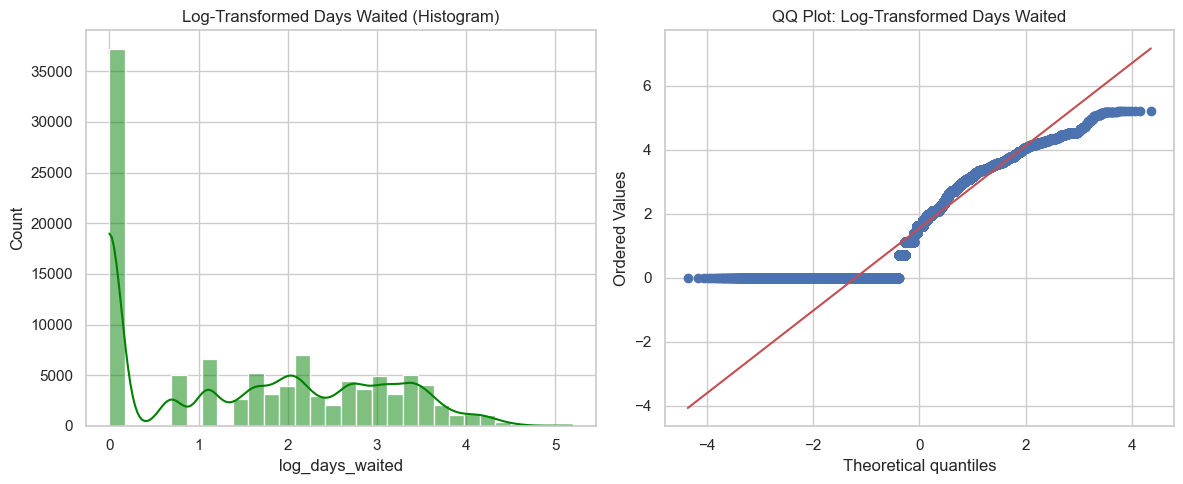

In [118]:
import numpy as np
from scipy.stats import shapiro, normaltest, probplot
import matplotlib.pyplot as plt
import seaborn as sns

df['log_days_waited'] = np.log1p(df['days_waited'])  # log1p handles 0 safely

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['log_days_waited'], kde=True, bins=30, color='green')
plt.title("Log-Transformed Days Waited (Histogram)")

plt.subplot(1, 2, 2)
probplot(df['log_days_waited'], dist="norm", plot=plt)
plt.title("QQ Plot: Log-Transformed Days Waited")

plt.tight_layout()
plt.show()

In [119]:
# 3. Normality tests
shapiro_log = shapiro(df['log_days_waited'])
dagostino_log = normaltest(df['log_days_waited'])

print("Shapiro-Wilk p-value:", round(shapiro_log.pvalue, 5))
print(" D’Agostino p-value:", round(dagostino_log.pvalue, 5))

if shapiro_log.pvalue > 0.05:
    print("Log-transformed 'days_waited' looks normally distributed (Shapiro).")
else:
    print(" Still not normally distributed (Shapiro).")

Shapiro-Wilk p-value: 0.0
 D’Agostino p-value: 0.0
 Still not normally distributed (Shapiro).


c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 106987.
  res = hypotest_fun_out(*samples, **kwds)


# ROC Curve: Logistic Regression vs Random Forest

Logistic Regression Accuracy: 0.6634264884568651
Random Forest Accuracy: 0.6935694924759324


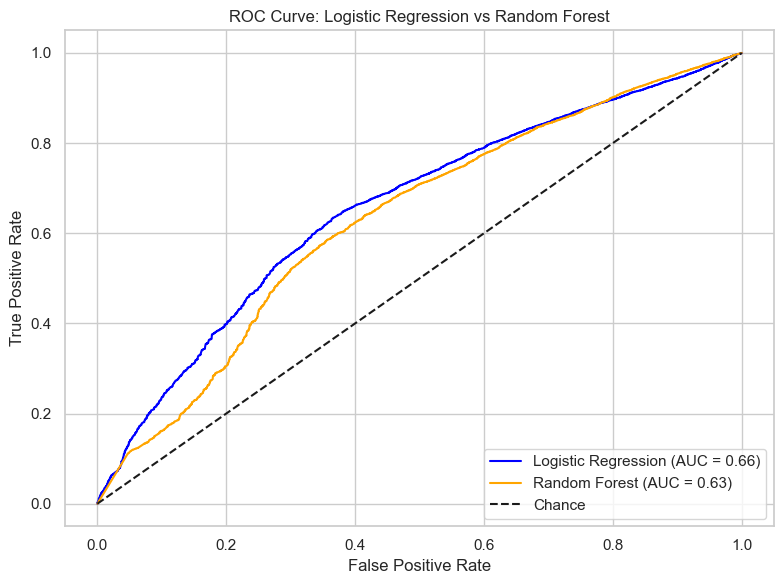

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# --- Logistic Regression Pipeline ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred_log = pipeline.predict(X_test)
y_probs_log = pipeline.predict_proba(X_test)[:, 1]

# --- Random Forest Model ---
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# --- Evaluation ---
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# --- ROC + AUC ---
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
auc_log = roc_auc_score(y_test, y_probs_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

# --- Plot ROC ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression vs Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Grid Search

Best Parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Cross-Validation Accuracy: 0.7971818776540366
Test Set Accuracy: 0.7982521731002897


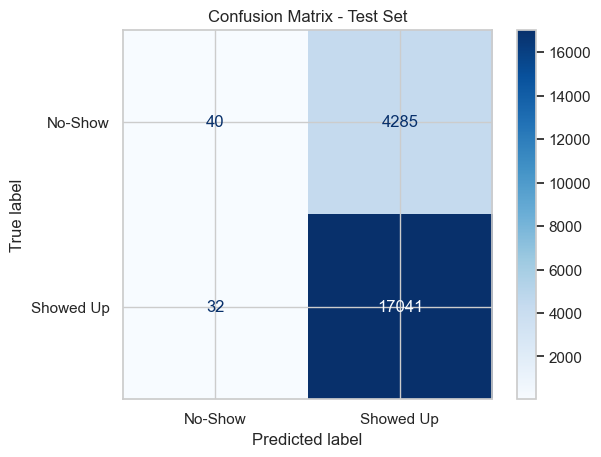

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
mlp = MLPClassifier(max_iter=300, random_state=42)

# Grid search parameters
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.05, 0.01],
    'learning_rate': ['constant']
}

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Set Accuracy:", test_accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No-Show", "Showed Up"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Neural Network

Epoch 1/50


c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2140/2140 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7936 - loss: 0.4930 - val_accuracy: 0.7979 - val_loss: 0.4614
Epoch 2/50
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7967 - loss: 0.4644 - val_accuracy: 0.7979 - val_loss: 0.4582
Epoch 3/50
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7958 - loss: 0.4633 - val_accuracy: 0.7979 - val_loss: 0.4557
Epoch 4/50
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7953 - loss: 0.4598 - val_accuracy: 0.7979 - val_loss: 0.4518
Epoch 5/50
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7986 - loss: 0.4583 - val_accuracy: 0.7980 - val_loss: 0.4502
Epoch 6/50
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7968 - loss: 0.4530 - val_accuracy: 0.7972 - val_loss: 0.4491
Epoch 7/50
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7986 - loss: 0.4540 - val_accuracy: 0.7978 - val_loss: 0.4478
Epoch 8/50
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7924 - loss: 0.4540 - val_accurac

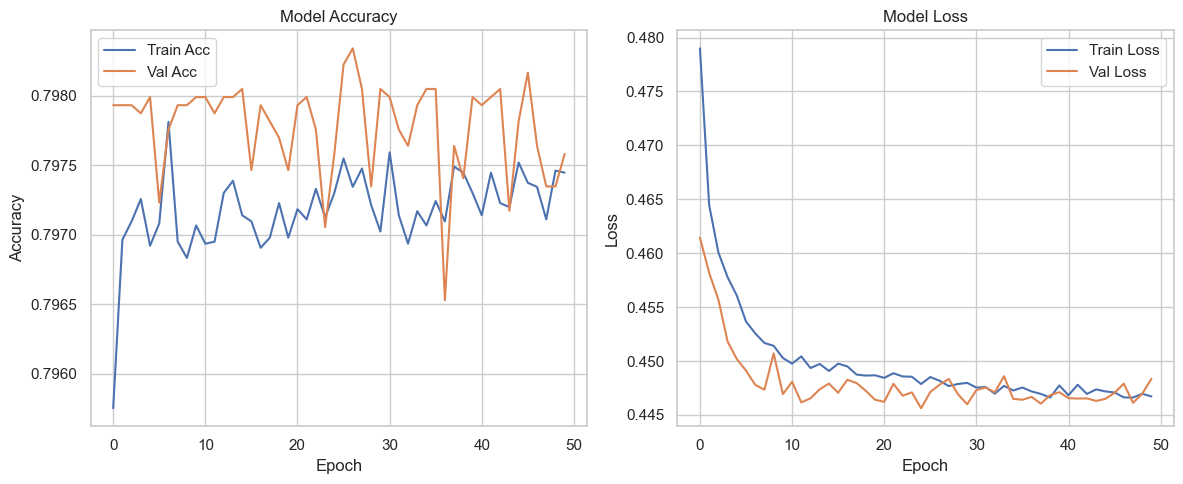

669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step


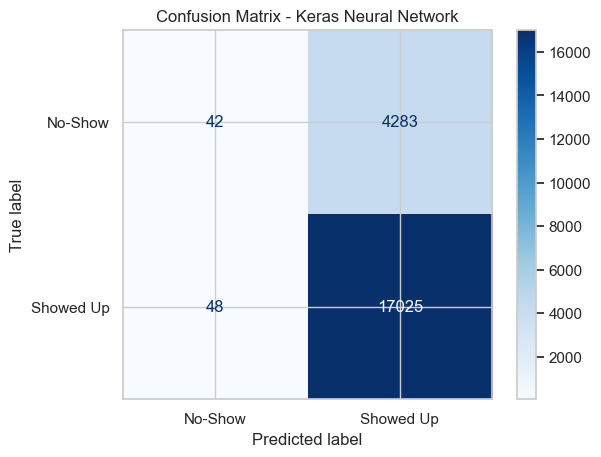

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define neural network architecture
model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Confusion matrix
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No-Show", "Showed Up"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Keras Neural Network")
plt.show()

# Evaluation Metrics for Neural Network

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Predict class labels
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("🔢 Evaluation Metrics for Neural Network:")
print(f"✅ Accuracy : {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"📞 Recall   : {recall:.4f}")
print(f"📊 F1-Score : {f1:.4f}\n")

# Classification report
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No-Show", "Showed Up"]))

669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step
🔢 Evaluation Metrics for Neural Network:
✅ Accuracy : 0.7976
🎯 Precision: 0.7990
📞 Recall   : 0.9972
📊 F1-Score : 0.8872

📋 Classification Report:
              precision    recall  f1-score   support

     No-Show       0.47      0.01      0.02      4325
   Showed Up       0.80      1.00      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.63      0.50      0.45     21398
weighted avg       0.73      0.80      0.71     21398



# ROC and Precision-Recall Curve

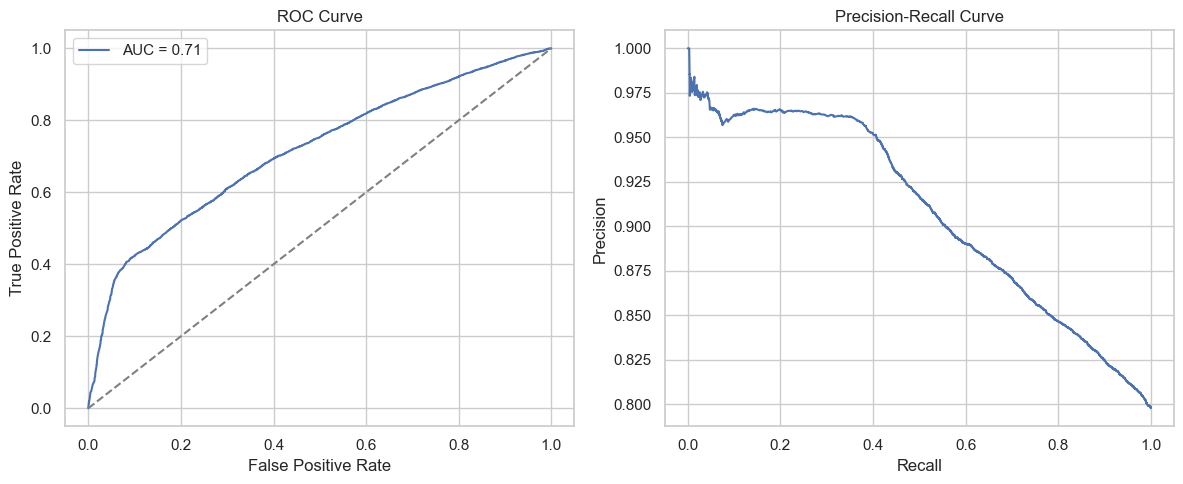

In [128]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# ROC and PR curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
# Plot
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.tight_layout()
plt.show()